In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../../data/preprocessed/era5-datasets/era_rh_vpd_2016_2017.csv")

In [9]:
df.head()

,valid_time,latitude,longitude,u10,v10,d2m,t2m,lai_hv,lai_lv,wind_speed,rh,vpd,number,expver
0,2016-01-01 00:00:00,31.3,77.50,-1.796256,-0.727640,-15.016418,-1.266510,2.174683,1.621314,1.938039,34.337837,3.659109,0,1
1,2016-01-01 00:00:00,31.3,77.75,-2.540030,-1.461649,-20.002747,-6.835846,2.435181,1.207129,2.930558,34.264458,2.411721,0,1
2,2016-01-01 00:00:00,31.3,78.00,-2.340568,-1.259500,-23.637512,-11.565338,3.491089,1.080359,2.657931,36.109970,1.617916,0,1
3,2016-01-01 00:00:00,31.3,78.25,-1.654532,-0.617289,-29.244934,-14.932526,4.195557,0.847266,1.765934,28.436842,1.378873,0,1
4,2016-01-01 00:00:00,31.3,78.50,-1.472403,-0.341532,-34.576965,-19.010650,3.301758,0.702429,1.511495,23.977932,1.040542,0,1


In [10]:
df.shape

(917400, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917400 entries, 0 to 917399
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   valid_time  917400 non-null  object 
 1   latitude    917400 non-null  float64
 2   longitude   917400 non-null  float64
 3   u10         917400 non-null  float64
 4   v10         917400 non-null  float64
 5   d2m         917400 non-null  float64
 6   t2m         917400 non-null  float64
 7   lai_hv      917400 non-null  float64
 8   lai_lv      917400 non-null  float64
 9   wind_speed  917400 non-null  float64
 10  rh          917400 non-null  float64
 11  vpd         917400 non-null  float64
 12  number      917400 non-null  int64  
 13  expver      917400 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 98.0+ MB


In [12]:
df.isnull().mean()

valid_time    0.0
latitude      0.0
longitude     0.0
u10           0.0
v10           0.0
d2m           0.0
t2m           0.0
lai_hv        0.0
lai_lv        0.0
wind_speed    0.0
rh            0.0
vpd           0.0
number        0.0
expver        0.0
dtype: float64

In [13]:
df.describe()

,latitude,longitude,u10,v10,d2m,t2m,lai_hv,lai_lv,wind_speed,rh,vpd,number,expver
count,917400.00000,917400.000000,917400.000000,917400.000000,917400.000000,917400.000000,917400.000000,917400.000000,917400.000000,917400.000000,917400.000000,917400.0,917400.0
mean,30.05000,79.250000,0.150064,0.029308,6.652004,12.774814,2.049522,1.738831,1.462043,69.724818,6.323804,0.0,1.0
std,0.79057,1.080124,1.333642,1.108904,14.099036,13.838940,1.393193,0.876063,0.945556,20.372156,8.069455,0.0,0.0
min,28.80000,77.500000,-9.313745,-8.142746,-54.415863,-40.709457,0.000000,0.484912,0.000998,2.306800,-0.003374,0.0,1.0
25%,29.30000,78.250000,-0.625095,-0.787913,-1.016388,4.507217,0.665039,0.828354,0.817327,55.493591,1.395349,0.0,1.0
50%,30.05000,79.250000,0.018216,-0.034714,9.382141,14.765533,2.296021,1.793860,1.277315,73.716377,3.285449,0.0,1.0
75%,30.80000,80.250000,0.857736,0.796525,17.136139,23.479691,3.179932,2.584546,1.853355,86.957431,8.106844,0.0,1.0
max,31.30000,81.000000,8.580847,8.186954,29.140778,44.279694,4.910522,3.204810,9.938551,100.021730,76.232420,0.0,1.0


In [25]:
df["valid_time"] = pd.to_datetime(df["valid_time"], errors="coerce")

In [27]:
df.isnull().mean()

valid_time    0.0
latitude      0.0
longitude     0.0
u10           0.0
v10           0.0
d2m           0.0
t2m           0.0
lai_hv        0.0
lai_lv        0.0
wind_speed    0.0
rh            0.0
vpd           0.0
number        0.0
expver        0.0
dtype: float64

In [28]:
print("Time range:", df["valid_time"].min(), "->", df["valid_time"].max())

Time range: 2016-01-01 00:00:00 -> 2017-12-29 21:00:00


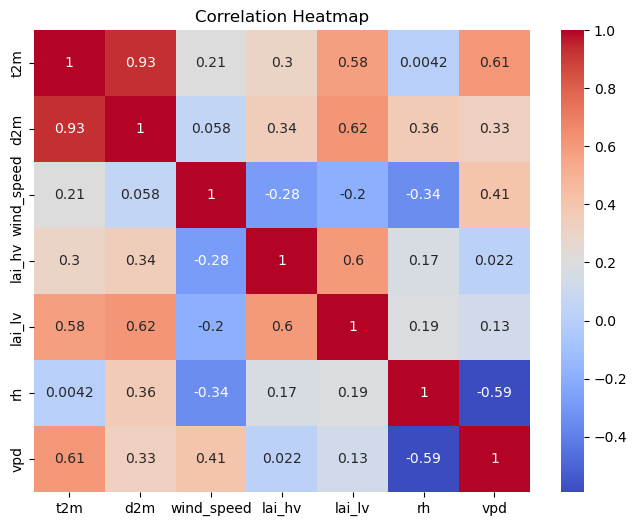

In [18]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[["t2m","d2m","wind_speed","lai_hv","lai_lv", "rh", "vpd"]].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


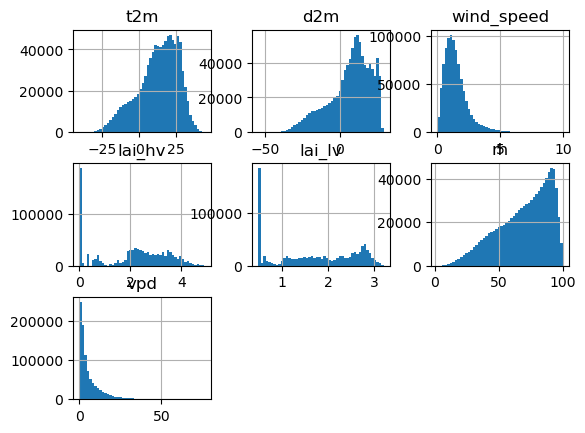

In [21]:
df[["t2m","d2m","wind_speed","lai_hv","lai_lv", "rh", "vpd"]].hist(bins=50)
plt.title("Variable Distributions")
plt.show()

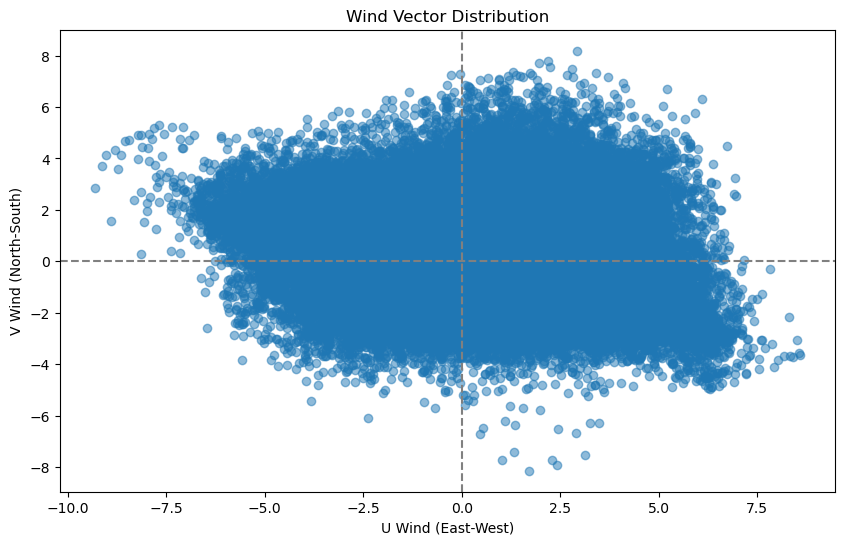

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df["u10"], df["v10"], alpha=0.5)
plt.xlabel("U Wind (East-West)")
plt.ylabel("V Wind (North-South)")
plt.title("Wind Vector Distribution")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()


C:\Users\Shivam\miniconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


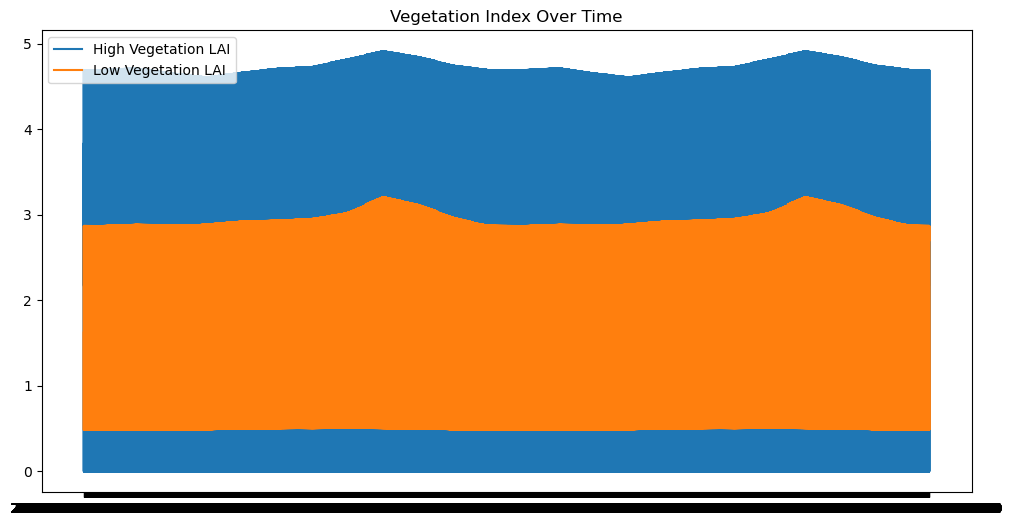

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df["valid_time"], df["lai_hv"], label="High Vegetation LAI")
plt.plot(df["valid_time"], df["lai_lv"], label="Low Vegetation LAI")
plt.legend()
plt.title("Vegetation Index Over Time")
plt.show()


In [30]:
df = df.sort_values("valid_time").reset_index(drop=True)

In [31]:
df_daily = df.resample("1D", on="valid_time").mean().reset_index()

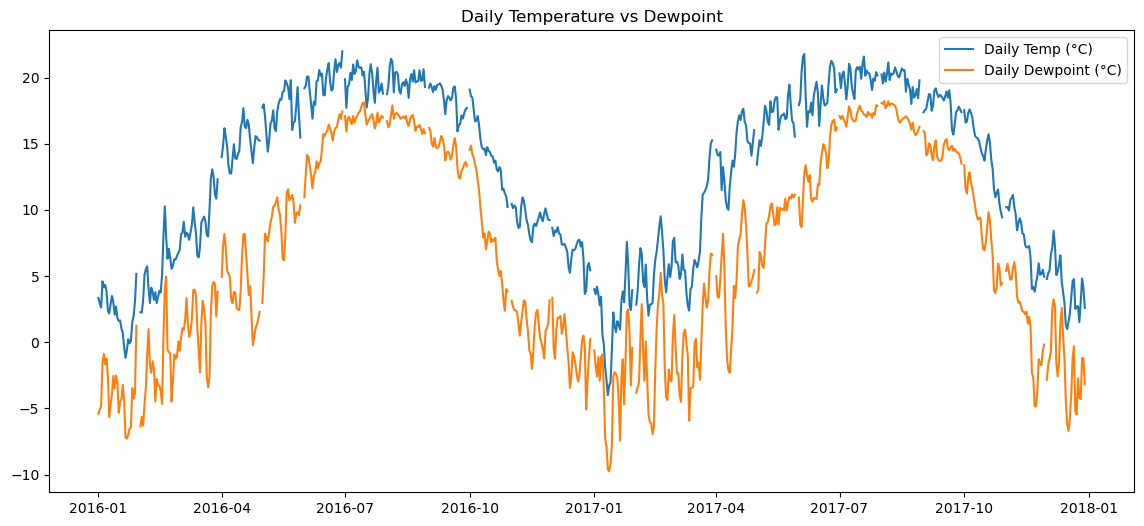

In [32]:
plt.figure(figsize=(14,6))
plt.plot(df_daily["valid_time"], df_daily["t2m"], label="Daily Temp (°C)")
plt.plot(df_daily["valid_time"], df_daily["d2m"], label="Daily Dewpoint (°C)")
plt.legend()
plt.title("Daily Temperature vs Dewpoint")
plt.show()

In [41]:
df["month"] = df["valid_time"].dt.month
monthly_avg = df.groupby("month")[["t2m","d2m","rh","vpd"]].mean()

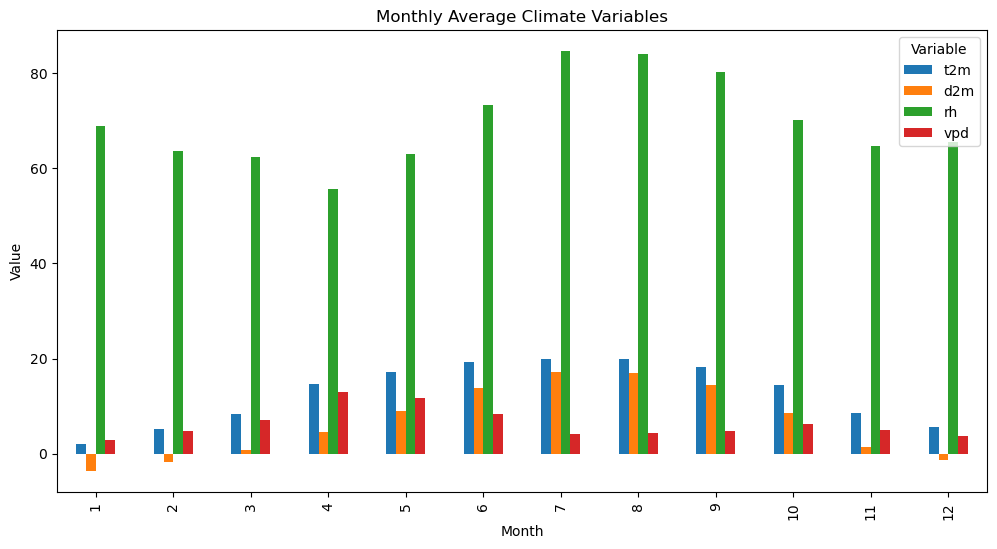

In [42]:
monthly_avg.plot(kind="bar", figsize=(12,6))
plt.title(f"Monthly Average Climate Variables")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend(title="Variable")
plt.show()

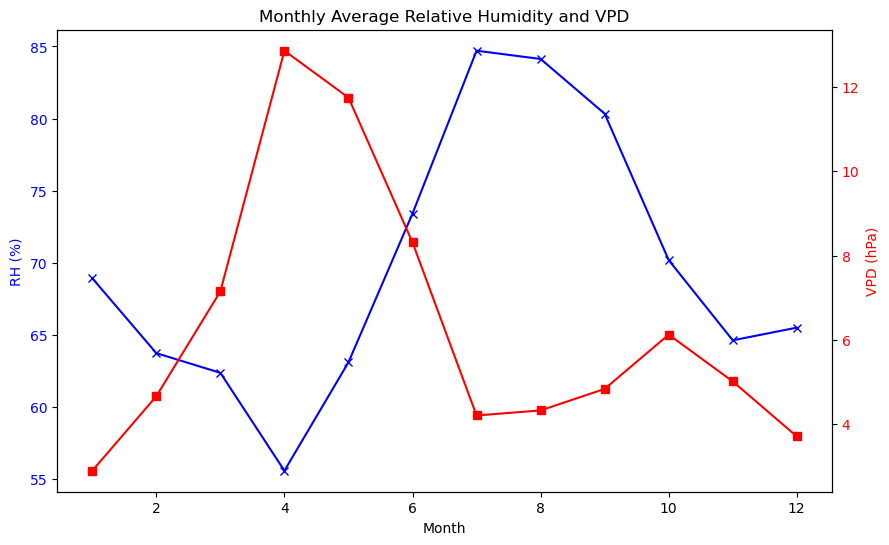

In [44]:
fig, ax1 = plt.subplots(figsize=(10,6))

# RH plot
ax1.set_title(f"Monthly Average Relative Humidity and VPD")
ax1.set_xlabel("Month")
ax1.set_ylabel("RH (%)", color="blue")
ax1.plot(monthly_avg.index, monthly_avg["rh"], marker="x", color="blue", label="RH")
ax1.tick_params(axis="y", labelcolor="blue")

# VPD plot (second axis)
ax2 = ax1.twinx()
ax2.set_ylabel("VPD (hPa)", color="red")
ax2.plot(monthly_avg.index, monthly_avg["vpd"], marker="s", color="red", label="VPD")
ax2.tick_params(axis="y", labelcolor="red")